In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\OneDrive\工作\学习\第五学期\投资学\投资学 案例研究\投资学 案研三\投资学 案研三 代码&数据'))
	print(os.getcwd())
except:
	pass


In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({"font.size": 11})
import numpy as np
import statsmodels.api as sm
from IPython.display import display
import seaborn as sns


In [35]:
path = os.getcwd()


In [36]:
data = pd.read_csv(
    open(
        path + "\\FamaFrench.csv", 
        'r', 
        encoding = "utf-8"
    ), 
    index_col = [0]
)
# data.index = pd.to_datetime(data.index, format = '%b-%y').strftime('%Y-%m')


# 收益率
可以看到，动量因子的收益率远高于其它因子，尤其是在2015年中。其余因子的收益率表现相差不大，均值都低于0。

Text(0.5,1,'Return of Factors')

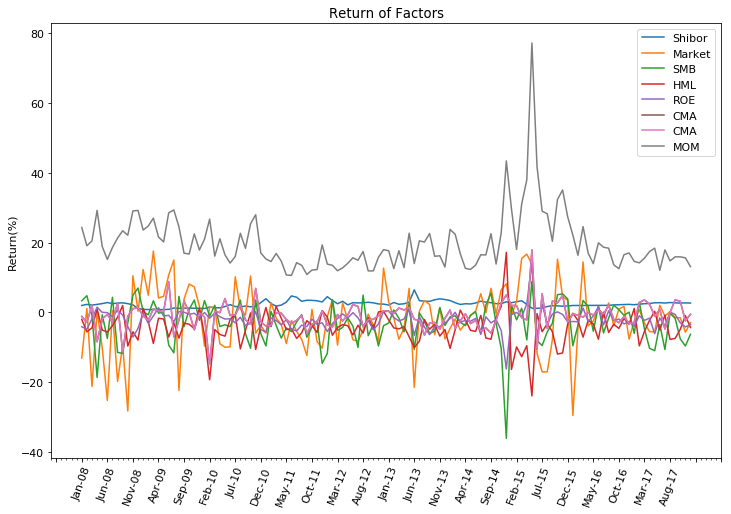

In [37]:
plt.figure(figsize = (12, 8))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation = 70)
plt.plot(data.index, data["Shibor"], label = "Shibor")
plt.plot(data.index, data["Market"], label = "Market")
plt.plot(data.index, data["SMB"], label = "SMB")
plt.plot(data.index, data["HML"], label = "HML")
plt.plot(data.index, data["ROE"], label = "ROE")
plt.plot(data.index, data["CMA"], label = "CMA")
plt.plot(data.index, data["CMA"], label = "CMA")
plt.plot(data.index, data["MOM"], label = "MOM")
plt.legend()
plt.ylabel("Return(%)")
plt.title("Return of Factors")


In [38]:
data.describe()


,Shibor,Market,SMB,HML,ROE,CMA,MOM,ME0BP0,ME0BP1,ME0BP2,...,ME3BP0,ME3BP1,ME3BP2,ME3BP3,ME3BP4,ME4BP0,ME4BP1,ME4BP2,ME4BP3,ME4BP4
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.391529,-1.855738,-3.077592,-4.464530,-2.133120,-0.963855,19.761993,1.664841,1.117263,0.442514,...,3.702431,2.362642,1.780316,1.294371,0.762216,4.320273,1.809436,1.265192,1.735443,1.100763
std,0.889648,8.989121,5.958622,4.553039,2.819122,3.803802,8.325334,11.050989,11.104426,10.730139,...,11.721207,10.368887,10.244759,10.125552,9.594999,11.353038,9.085804,9.230414,8.721200,9.092975
min,0.803582,-29.535931,-36.079260,-23.947787,-16.207890,-14.895867,10.611562,-26.104895,-31.835864,-33.176358,...,-26.150575,-26.386979,-29.065758,-29.133660,-26.452483,-21.352238,-23.547693,-25.639417,-22.475910,-26.939990
25%,1.866313,-6.722316,-6.071562,-6.560288,-3.512013,-2.847319,14.612304,-5.393821,-5.205359,-5.765252,...,-3.062910,-3.097955,-3.228491,-3.978126,-4.311305,-1.533493,-3.284972,-2.977532,-2.524531,-3.831161
50%,2.413980,-1.355685,-2.925407,-4.442765,-1.914440,-1.000553,17.552181,2.758905,2.282874,1.378960,...,3.345745,2.389918,2.167422,1.548886,0.767332,4.003287,2.385493,2.117511,2.054107,1.382359
75%,2.806922,2.844453,0.813304,-1.964928,-0.589128,0.741648,22.609008,8.841230,6.832669,6.706652,...,9.730519,7.411839,7.401030,6.484346,5.833401,8.323933,6.311672,5.552510,6.588335,5.345399
max,6.468176,17.584159,8.897063,17.213223,14.100332,17.898765,77.189281,31.084765,31.253123,25.181478,...,63.250741,38.905684,31.259587,24.768550,22.834147,62.828819,25.823137,21.750587,22.480232,31.554630


# 统计报告

## 因子间相关性
因子间的相关性比较大，这使得模型可能出现过拟合。其中HML和SMB、ROE和SMB等因子间的相关性特别高。如图为SMB和HML的图例。

In [39]:
factors = list(data.columns[1:7])
correlation = pd.DataFrame(index = factors, columns = factors)
for factor_x in factors:
    for factor_y in factors:
        correlation.loc[factor_x, factor_y] = np.corrcoef(
            data[factor_x], data[factor_y]
        )[0][1]
correlation


,Market,SMB,HML,ROE,CMA,MOM
Market,1,0.209565,-0.0927207,0.14921,0.0843781,0.292963
SMB,0.209565,1,-0.634243,0.445343,0.101804,0.0489041
HML,-0.0927207,-0.634243,1,-0.554817,-0.230356,-0.298643
ROE,0.14921,0.445343,-0.554817,1,0.381226,0.312093
CMA,0.0843781,0.101804,-0.230356,0.381226,1,0.325905
MOM,0.292963,0.0489041,-0.298643,0.312093,0.325905,1


C:\Users\KasperLin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


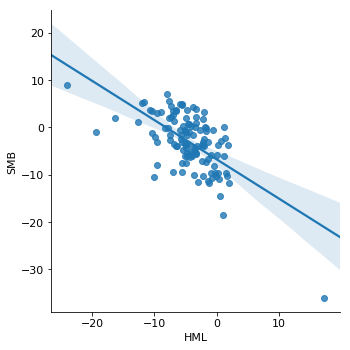

In [40]:
sns.lmplot("HML", "SMB", data)


## 因子参数
在25个分组的被解释变量中，因子的系数值相差不大，模型对不同风格的投资组合的解释性比较强。

其中系数相对较大的有 $\beta$ 和SMB。

In [41]:
for factor in factors:
    parameters = pd.DataFrame(
        index = ["ME" + str(i) for i in range(5)], 
        columns = ["BP" + str(i) for i in range(5)]
    )
    parameters.index.name = "Parameters of " + factor
    for i in range(5):
        for j in range(5):
            y = list(data["ME" + str(i) + "BP" + str(j)])
            x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
            x = sm.add_constant(x)
            result = sm.OLS(y, x).fit()
            parameters.iloc[i, j] = result.params[factor]
    display(parameters)


,BP0,BP1,BP2,BP3,BP4
Parameters of Market,,,,,
ME0,0.973124,0.983065,0.951422,0.994599,0.97529
ME1,1.00197,0.955012,0.989937,0.991315,0.960902
ME2,0.937634,0.985608,0.996106,0.965257,1.01143
ME3,0.961281,0.955536,0.994559,1.02404,0.977843
ME4,1.03506,0.989141,1.02331,0.934456,0.989226


,BP0,BP1,BP2,BP3,BP4
Parameters of SMB,,,,,
ME0,0.688744,0.714717,0.770626,0.700231,0.699419
ME1,0.551344,0.61614,0.658785,0.594067,0.616434
ME2,0.46613,0.435887,0.45953,0.529243,0.504404
ME3,0.330681,0.341306,0.361262,0.32556,0.288235
ME4,-0.668081,-0.252607,-0.223159,-0.296529,-0.299492


,BP0,BP1,BP2,BP3,BP4
Parameters of HML,,,,,
ME0,-0.26278,-0.276935,-0.162308,-0.125571,-0.0648696
ME1,-0.343722,-0.275033,-0.201705,-0.0894505,-0.0357298
ME2,-0.359325,-0.330413,-0.201201,-0.111165,-0.0188457
ME3,-0.464203,-0.343909,-0.183689,-0.159066,0.000528283
ME4,-1.48505,-0.201939,-0.103954,-0.0120891,0.311209


,BP0,BP1,BP2,BP3,BP4
Parameters of ROE,,,,,
ME0,-0.285129,-0.225641,-0.293962,-0.214524,-0.286509
ME1,-0.126359,-0.133787,-0.246443,-0.26342,-0.273881
ME2,0.27079,0.0149832,-0.0506243,-0.164069,-0.180784
ME3,0.293409,0.0271374,0.0218246,-0.0803569,-0.0717324
ME4,-0.166685,-0.361995,-0.271425,-0.0192589,-0.221915


,BP0,BP1,BP2,BP3,BP4
Parameters of CMA,,,,,
ME0,0.00758401,-0.117193,-0.110249,-0.126299,-0.211194
ME1,0.158363,-0.138066,-0.0895266,-0.114957,-0.212069
ME2,0.213959,-0.123631,-0.145988,-0.226035,-0.222074
ME3,0.0104104,-0.0299374,-0.186399,-0.155059,-0.136125
ME4,-0.420353,0.0984175,0.0822943,-0.139896,-0.123009


,BP0,BP1,BP2,BP3,BP4
Parameters of MOM,,,,,
ME0,0.0255467,0.0502839,0.0158153,-0.0395347,-0.0356836
ME1,0.120557,0.0670917,0.0353972,0.0162832,0.000880258
ME2,0.260102,0.104457,0.066073,0.0713211,0.0171894
ME3,0.281403,0.117339,0.078533,0.0117596,0.0509579
ME4,0.105291,0.0407669,-0.0211754,0.103513,0.0329027


## 因子 t 值

因子的 t 值指出其统计显著性。大部分的因子都至少在部分投资组合上展现出显著性。尤其是 Market 和 SMB 因子。

In [42]:
for factor in factors:
    tvalues = pd.DataFrame(
        index = ["ME" + str(i) for i in range(5)], 
        columns = ["BP" + str(i) for i in range(5)]
    )
    tvalues.index.name = "t values of " + factor
    for i in range(5):
        for j in range(5):
            y = list(data["ME" + str(i) + "BP" + str(j)])
            x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
            x = sm.add_constant(x)
            result = sm.OLS(y, x).fit()
            tvalues.iloc[i, j] = result.tvalues[factor]
    display(tvalues)


,BP0,BP1,BP2,BP3,BP4
t values of Market,,,,,
ME0,29.8646,44.6171,42.2722,44.1569,41.61
ME1,31.9636,41.7388,45.8218,42.5176,44.7146
ME2,22.572,34.1663,36.8254,40.2031,46.67
ME3,26.528,33.9254,40.1527,42.5493,39.7577
ME4,21.9876,38.0984,39.3933,39.147,58.2079


,BP0,BP1,BP2,BP3,BP4
t values of SMB,,,,,
ME0,10.939,16.7875,17.7198,16.0888,15.4431
ME1,9.10245,13.9362,15.7812,13.1864,14.8453
ME2,5.80734,7.81989,8.79203,11.4079,12.0451
ME3,4.72276,6.27126,7.54812,7.00067,6.065
ME4,-7.3447,-5.03531,-4.44596,-6.42893,-9.12021


,BP0,BP1,BP2,BP3,BP4
t values of HML,,,,,
ME0,-3.00392,-4.6817,-2.68613,-2.07656,-1.03089
ME1,-4.0843,-4.47736,-3.47767,-1.42905,-0.619308
ME2,-3.22204,-4.26636,-2.77063,-1.72461,-0.323905
ME3,-4.77165,-4.54808,-2.76232,-2.46183,0.00800064
ME4,-11.7506,-2.89717,-1.49062,-0.188642,6.82094


,BP0,BP1,BP2,BP3,BP4
t values of ROE,,,,,
ME0,-2.29255,-2.68303,-3.42184,-2.49525,-3.2025
ME1,-1.05608,-1.53191,-2.98861,-2.96002,-3.33903
ME2,1.70788,0.136077,-0.490331,-1.79032,-2.18549
ME3,2.12136,0.252426,0.230844,-0.874756,-0.764109
ME4,-0.927675,-3.65291,-2.7375,-0.211378,-3.42106


,BP0,BP1,BP2,BP3,BP4
t values of CMA,,,,,
ME0,0.09579,-2.18905,-2.01599,-2.30772,-3.70833
ME1,2.07917,-2.48342,-1.70549,-2.0292,-4.06144
ME2,2.11983,-1.76381,-2.22123,-3.87459,-4.21726
ME3,0.118237,-0.437446,-3.09714,-2.65158,-2.27784
ME4,-3.67501,1.5601,1.30383,-2.412,-2.97891


,BP0,BP1,BP2,BP3,BP4
t values of MOM,,,,,
ME0,0.66749,1.94298,0.598244,-1.49434,-1.29614
ME1,3.27428,2.49643,1.39494,0.594588,0.0348739
ME2,5.33091,3.08284,2.07963,2.52904,0.675277
ME3,6.61154,3.54683,2.69934,0.415997,1.76394
ME4,1.90424,1.33683,-0.694017,3.69194,1.64831


## 因子的$R^2$

$R^2$ 统计模型对数据的解释性，可以看到模型的解释性良好，在不同被解释变量中的平均值高达94.8%。最好的有97.29%，最差的也有94.16%。

In [43]:
rsquared = pd.DataFrame(
    index = ["ME" + str(i) for i in range(5)], 
    columns = ["BP" + str(i) for i in range(5)]
)
rsquared.index.name = "R square of Regression"
for i in range(5):
    for j in range(5):
        y = list(data["ME" + str(i) + "BP" + str(j)])
        x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
        x = sm.add_constant(x)
        result = sm.OLS(y, x).fit()
        rsquared.iloc[i, j] = result.rsquared
display(rsquared)


,BP0,BP1,BP2,BP3,BP4
R square of Regression,,,,,
ME0,0.932553,0.969457,0.965867,0.965743,0.960922
ME1,0.941684,0.964263,0.968883,0.960963,0.964629
ME2,0.905969,0.944476,0.948719,0.956993,0.965179
ME3,0.925854,0.942757,0.954651,0.956172,0.949026
ME4,0.866619,0.936654,0.938558,0.941882,0.972901


In [44]:
sum(list(rsquared.mean()))/5


0.9480548778434097

In [45]:
max(list(rsquared.max()))


0.9729007171282669

In [46]:
min(list(rsquared.max()))


0.941683652490355

## 因子修正后的$R^2$
修正后的$R^2$有相似的表现。平均值达到94.53%。

In [47]:
rsquared_adj = pd.DataFrame(
    index = ["ME" + str(i) for i in range(5)], 
    columns = ["BP" + str(i) for i in range(5)]
)
rsquared_adj.index.name = "Adjusted R square of Regression"
for i in range(5):
    for j in range(5):
        y = list(data["ME" + str(i) + "BP" + str(j)])
        x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
        x = sm.add_constant(x)
        result = sm.OLS(y, x).fit()
        rsquared_adj.iloc[i, j] = result.rsquared_adj
display(rsquared_adj)


,BP0,BP1,BP2,BP3,BP4
Adjusted R square of Regression,,,,,
ME0,0.928972,0.967835,0.964055,0.963924,0.958847
ME1,0.938587,0.962365,0.967231,0.95889,0.96275
ME2,0.900976,0.941528,0.945996,0.95471,0.96333
ME3,0.921917,0.939718,0.952243,0.953845,0.946319
ME4,0.859537,0.933291,0.935296,0.938796,0.971462


In [48]:
sum(list(rsquared_adj.mean()))/5


0.9452967297642989

In [49]:
max(list(rsquared_adj.max()))


0.9714618171527766

In [50]:
min(list(rsquared_adj.max()))


0.9385872092597544

## 回归报告
取其中一个被解释变量展示回归结果。可以看到，除了动量因子以外的所有银子，在统计上都是显著的(t>2)。JB检验和DW检验的效果也十分好。

In [51]:
y = list(data["ME4BP4"])
x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     676.1
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           4.62e-86
Time:                        21:02:59   Log-Likelihood:                -218.18
No. Observations:                 120   AIC:                             450.4
Df Residuals:                     113   BIC:                             469.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1620      0.489      4.418      0.0

## 因子回归图

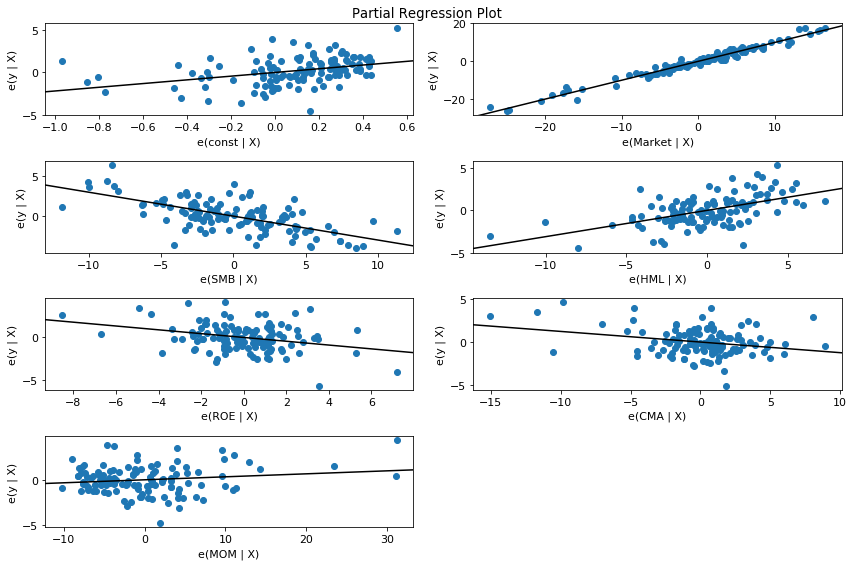

In [52]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_partregress_grid(result, fig = fig)